## Unlearning performance for NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot options
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['legend.fontsize'] = 11

In [2]:
model_type = "nn"
method_list = ["ori", "retrain", "unlearn"]
creteria_list = ["mse", "mape", "cost"]
unlearn_prop_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

mse_remain_ori = []
mse_remain_unlearn = []
mse_unlearn_ori = []
mse_unlearn_unlearn = []
mse_test_ori = []
mse_test_unlearn = []

mape_remain_ori = []
mape_remain_unlearn = []
mape_unlearn_ori = []
mape_unlearn_unlearn = []
mape_test_ori = []
mape_test_unlearn = []

cost_remain_ori = []
cost_remain_unlearn = []
cost_unlearn_ori = []
cost_unlearn_unlearn = []
cost_test_ori = []
cost_test_unlearn = []

for unlearn_prop in unlearn_prop_list:
    print('unlearn_prop: ', unlearn_prop)
    model_dir = f"simulation_result/{model_type}/unlearning_{unlearn_prop}.npy"
    metric = np.load(model_dir, allow_pickle=True).item()
    for creteria in creteria_list:
        for method in method_list:
            print(f"{creteria}_{method}:")
            data = metric[creteria + "_" + method]
            print(data)
            
            if creteria == "mse" and method == "ori":
                mse_remain_ori.append(data["remain"])
                mse_unlearn_ori.append(data["unlearn"])
                mse_test_ori.append(data["test"])
            if creteria == "mse" and method == "unlearn":
                mse_remain_unlearn.append(data["remain"])
                mse_unlearn_unlearn.append(data["unlearn"])
                mse_test_unlearn.append(data["test"])
            
            if creteria == "cost" and method == "ori":
                cost_remain_ori.append(data["remain"])
                cost_unlearn_ori.append(data["unlearn"])
                cost_test_ori.append(data["test"])
            if creteria == "cost" and method == "unlearn":
                cost_remain_unlearn.append(data["remain"])
                cost_unlearn_unlearn.append(data["unlearn"])
                cost_test_unlearn.append(data["test"])
                
            if creteria == "mape" and method == "ori":
                mape_remain_ori.append(data["remain"])
                mape_unlearn_ori.append(data["unlearn"])
                mape_test_ori.append(data["test"])
            if creteria == "mape" and method == "unlearn":
                mape_remain_unlearn.append(data["remain"])
                mape_unlearn_unlearn.append(data["unlearn"])
                mape_test_unlearn.append(data["test"])
            
    print("\n")

mse_remain_ori = np.array(mse_remain_ori)
mse_remain_unlearn = np.array(mse_remain_unlearn)
mse_unlearn_ori = np.array(mse_unlearn_ori)
mse_unlearn_unlearn = np.array(mse_unlearn_unlearn)
mse_test_ori = np.array(mse_test_ori)
mse_test_unlearn = np.array(mse_test_unlearn)

cost_remain_ori = np.array(cost_remain_ori)
cost_remain_unlearn = np.array(cost_remain_unlearn)
cost_unlearn_ori = np.array(cost_unlearn_ori)
cost_unlearn_unlearn = np.array(cost_unlearn_unlearn)
cost_test_ori = np.array(cost_test_ori)
cost_test_unlearn = np.array(cost_test_unlearn)

mape_remain_ori = np.array(mape_remain_ori)
mape_remain_unlearn = np.array(mape_remain_unlearn)
mape_unlearn_ori = np.array(mape_unlearn_ori)
mape_unlearn_unlearn = np.array(mape_unlearn_unlearn)
mape_test_ori = np.array(mape_test_ori)
mape_test_unlearn = np.array(mape_test_unlearn)

unlearn_prop:  0.05
mse_ori:
{'remain': 0.00046439588, 'unlearn': 0.00063939986, 'test': 0.004104777}
mse_retrain:
{'remain': 0.00046320405, 'unlearn': 0.00068677263, 'test': 0.004273092}
mse_unlearn:
{'remain': 0.000463204, 'unlearn': 0.00068677246, 'test': 0.0042730905}
mape_ori:
{'remain': 3.5188768059015274, 'unlearn': 4.210196062922478, 'test': 9.151901304721832}
mape_retrain:
{'remain': 3.516652062535286, 'unlearn': 4.357520490884781, 'test': 9.25726518034935}
mape_unlearn:
{'remain': 3.516651690006256, 'unlearn': 4.357519745826721, 'test': 9.25726369023323}
cost_ori:
{'remain': 489.7166372985643, 'unlearn': 512.9364286354387, 'test': 470.3369149935677}
cost_retrain:
{'remain': 485.3137782807498, 'unlearn': 529.1196410794942, 'test': 480.7067653786247}
cost_unlearn:
{'remain': 485.3137785187879, 'unlearn': 529.1194587496449, 'test': 480.7067281099992}


unlearn_prop:  0.1
mse_ori:
{'remain': 0.0004596318, 'unlearn': 0.0005948326, 'test': 0.004104777}
mse_retrain:
{'remain': 0.000

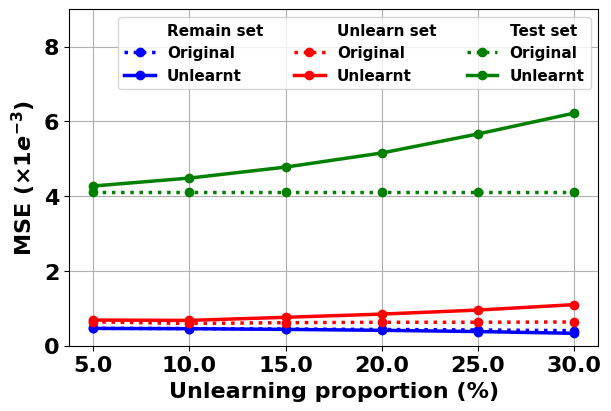

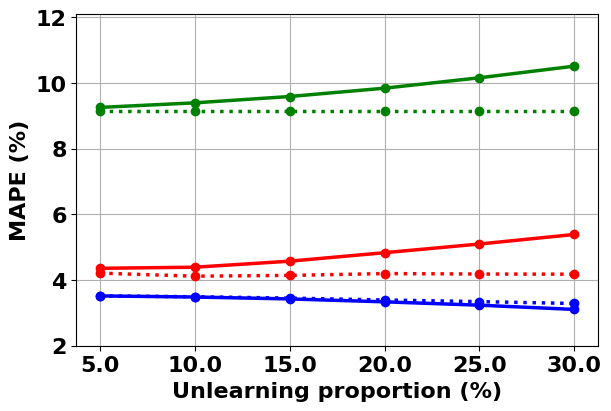

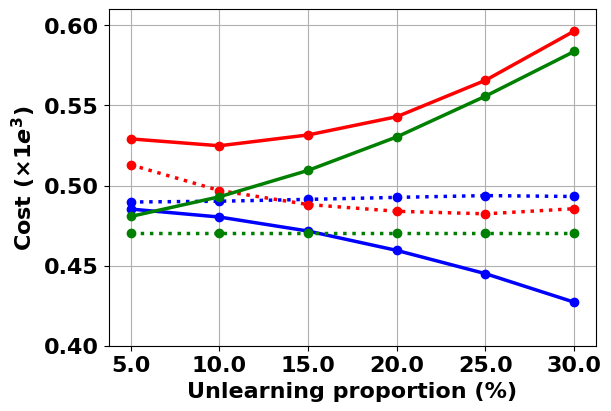

In [3]:
plt.figure()
p11 = plt.plot(mse_remain_ori * 1e3, color = "blue", linestyle=':', marker = "o")
p12 = plt.plot(mse_remain_unlearn* 1e3, color = "blue", linestyle = "-", marker = "o")
p13 = plt.plot([0], marker='None', linestyle='None')
p21 = plt.plot(mse_unlearn_ori* 1e3, color = "red", linestyle = ":", marker = "o")
p22 = plt.plot(mse_unlearn_unlearn* 1e3, color = "red", linestyle = "-", marker = "o")
p23 = plt.plot([0], marker='None', linestyle='None')
p31 = plt.plot(mse_test_ori* 1e3, color = "green", linestyle = ":", marker = "o")
p32 = plt.plot(mse_test_unlearn* 1e3, color = "green", linestyle = "-", marker = "o")
p33 = plt.plot([0], marker='None', linestyle='None')
plt.xticks(np.arange(len(unlearn_prop_list)), np.array(unlearn_prop_list) * 100)
plt.grid()
plt.xlabel("Unlearning proportion (%)")
plt.ylabel(r"MSE ($\times 1e^{-3}$)")
plt.ylim([0, 9])
leg1 = plt.legend([p13[0], p11[0], p12[0], p13[0], p21[0], p22[0], p13[0], p31[0], p32[0]], ["Remain set", "Original", "Unlearnt", "Unlearn set", "Original", "Unlearnt", "Test set", "Original", "Unlearnt"],
                ncol = 3, loc = "best")
plt.savefig(f"figs/{model_type}_unlearn_mse.pdf", bbox_inches='tight')
plt.show()

plt.figure()
p11 = plt.plot(mape_remain_ori, color = "blue", linestyle = ":", marker = "o")
p12 = plt.plot(mape_remain_unlearn, color = "blue", linestyle = "-", marker = "o")
p13 = plt.plot([0], marker='None', linestyle='None')
p21 = plt.plot(mape_unlearn_ori, color = "red", linestyle = ":", marker = "o")
p22 = plt.plot(mape_unlearn_unlearn, color = "red", linestyle = "-", marker = "o")
p23 = plt.plot([0], marker='None', linestyle='None')
p31 = plt.plot(mape_test_ori, color = "green", linestyle = ":", marker = "o")
p32 = plt.plot(mape_test_unlearn, color = "green", linestyle = "-", marker = "o")
p33 = plt.plot([0], marker='None', linestyle='None')
plt.xticks(np.arange(len(unlearn_prop_list)), np.array(unlearn_prop_list) * 100)
plt.grid()
plt.xlabel("Unlearning proportion (%)")
plt.ylabel(r"MAPE (%)")
plt.ylim([2, 12.1])
# leg1 = plt.legend([p13[0], p11[0], p12[0], p13[0], p21[0], p22[0], p13[0], p31[0], p32[0]], ["Remain", "Original", "Unlearned", "Unlearn", "Original", "Unlearned", "Test", "Original", "Unlearned"],
#                 ncol = 3, loc = "best")
plt.savefig(f"figs/{model_type}_unlearn_mape.pdf", bbox_inches='tight')

plt.figure()
p11 = plt.plot(cost_remain_ori / 1e3, color = "blue", linestyle = ":", marker = "o")
p12 = plt.plot(cost_remain_unlearn/ 1e3, color = "blue", linestyle = "-", marker = "o")
p13 = plt.plot([0], marker='None', linestyle='None')
p21 = plt.plot(cost_unlearn_ori/ 1e3, color = "red", linestyle = ":", marker = "o")
p22 = plt.plot(cost_unlearn_unlearn/ 1e3, color = "red", linestyle = "-", marker = "o")
p23 = plt.plot([0], marker='None', linestyle='None')
p31 = plt.plot(cost_test_ori/ 1e3, color = "green", linestyle = ":", marker = "o")
p32 = plt.plot(cost_test_unlearn/ 1e3, color = "green", linestyle = "-", marker = "o")
p33 = plt.plot([0], marker='None', linestyle='None')
plt.xticks(np.arange(len(unlearn_prop_list)), np.array(unlearn_prop_list) * 100)
plt.grid()
plt.xlabel("Unlearning proportion (%)")
plt.ylabel(r"Cost ($\times 1e^{3}$)")
plt.ylim([0.4, 0.61])
# leg1 = plt.legend([p13[0], p11[0], p12[0], p13[0], p21[0], p22[0], p13[0], p31[0], p32[0]], ["Remain", "Original", "Unlearned", "Unlearn", "Original", "Unlearned", "Test", "Original", "Unlearned"],
#                 ncol = 3, loc = "best")
plt.savefig(f"figs/{model_type}_unlearn_cost.pdf", bbox_inches='tight')
plt.show()


## Sensitivity analysis

over number:  1593 under number:  2087


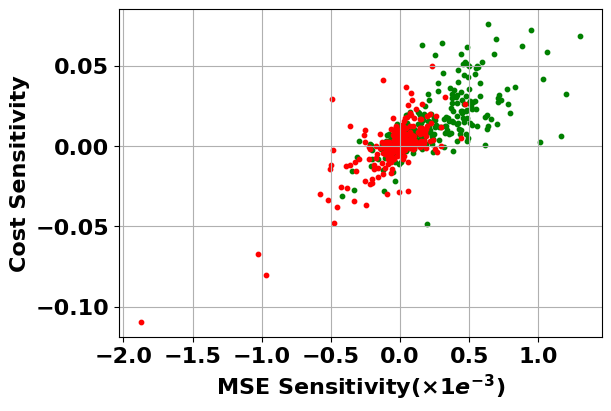

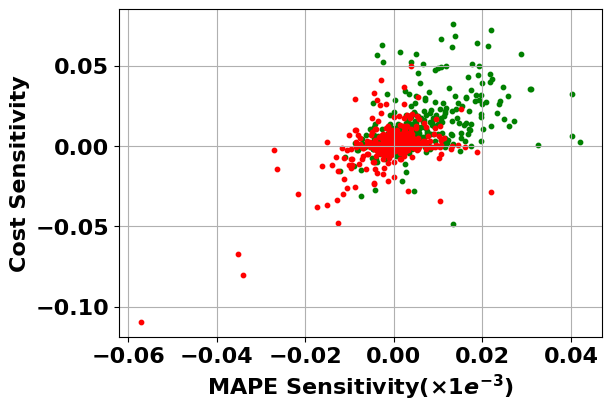

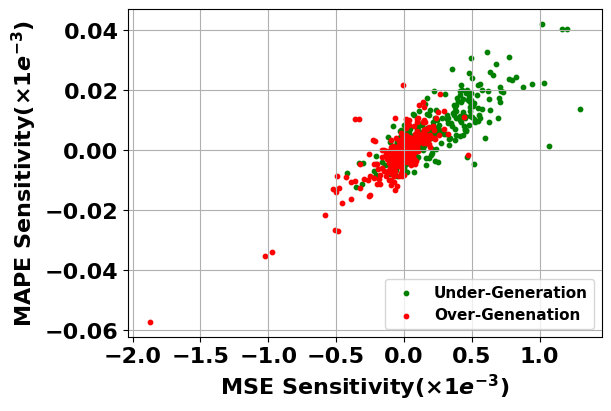

r_mse_mape:  PearsonRResult(statistic=0.8312050705041542, pvalue=0.0)
r_mse_cost:  PearsonRResult(statistic=0.7355922708950228, pvalue=0.0)
r_mape_cost:  PearsonRResult(statistic=0.5259072297042774, pvalue=6.588527484969731e-261)


In [4]:
mse_scores = np.load(f"simulation_result/{model_type}/unchange_0.25_mse_scores.npy", allow_pickle=True).item()
mape_scores = np.load(f"simulation_result/{model_type}/unchange_0.25_mape_scores.npy", allow_pickle=True).item()
cost_scores = np.load(f"simulation_result/{model_type}/unchange_0.25_cost_scores.npy", allow_pickle=True).item()

mismatch = mse_scores['mismatch_remain']
over_index = np.where(mismatch > 0)[0]
under_index = np.where(mismatch <= 0)[0]
print('over number: ', len(over_index), 'under number: ', len(under_index))

np.random.seed(20)

number_point = 500
over_index = np.random.choice(over_index, number_point, replace = False)
under_index = np.random.choice(under_index, number_point, replace = False)

plt.figure()
plt.scatter(mse_scores['remain'][under_index] * 1e3, cost_scores['remain'][under_index], s = 10, color = 'green', label = 'Under-Generation')
plt.scatter(mse_scores['remain'][over_index] * 1e3, cost_scores['remain'][over_index], s = 10, color = 'red', label = 'Over-Genenation')
plt.xlabel(r"MSE Sensitivity($\times 1e^{-3}$)")
plt.ylabel(r"Cost Sensitivity")
# plt.legend()
plt.grid()
plt.savefig(f"figs/{model_type}_sensitivity_mse-cost.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(mape_scores['remain'][under_index] * 1e3, cost_scores['remain'][under_index], s = 10, color = 'green', label = 'Under-Generation')
plt.scatter(mape_scores['remain'][over_index] * 1e3, cost_scores['remain'][over_index], s = 10, color = 'red', label = 'Over-Genenation')
plt.xlabel(r"MAPE Sensitivity($\times 1e^{-3}$)")
plt.ylabel(r"Cost Sensitivity")
# plt.legend()
plt.grid()
plt.savefig(f"figs/{model_type}_sensitivity_mape-cost.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(mse_scores['remain'][under_index] * 1e3, mape_scores['remain'][under_index] * 1e3, s = 10, color = 'green', label = 'Under-Generation')
plt.scatter(mse_scores['remain'][over_index] * 1e3, mape_scores['remain'][over_index] * 1e3, s = 10, color = 'red', label = 'Over-Genenation')
plt.xlabel(r"MSE Sensitivity($\times 1e^{-3}$)")
plt.ylabel(r"MAPE Sensitivity($\times 1e^{-3}$)")
plt.legend()
plt.grid()
plt.savefig(f"figs/{model_type}_sensitivity_mse-mape.pdf", bbox_inches='tight')
plt.show()

# the correlations
from scipy.stats import pearsonr
r_mse_mape = pearsonr(mse_scores['remain'], mape_scores['remain'])
r_mse_cost = pearsonr(mse_scores['remain'], cost_scores['remain'])
r_mape_cost = pearsonr(mape_scores['remain'], cost_scores['remain'])

print("r_mse_mape: ", r_mse_mape)
print("r_mse_cost: ", r_mse_cost)
print("r_mape_cost: ", r_mape_cost)

## Performance unchanged

In [5]:
unchange_mse = np.load(f"simulation_result/{model_type}/unchange_0.25_mse.npy", allow_pickle=True).item()
unchange_mape = np.load(f"simulation_result/{model_type}/unchange_0.25_mape.npy", allow_pickle=True).item()
unchange_cost = np.load(f"simulation_result/{model_type}/unchange_0.25_cost.npy", allow_pickle=True).item()

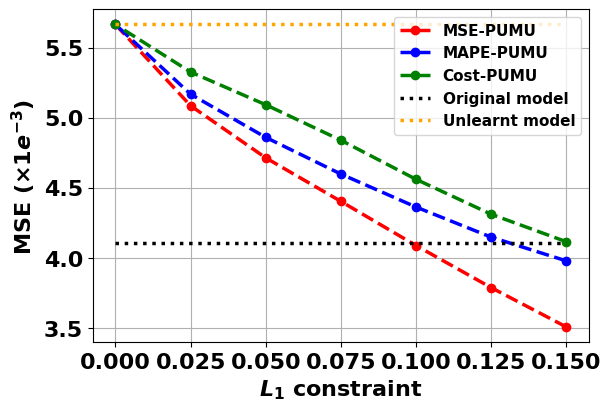

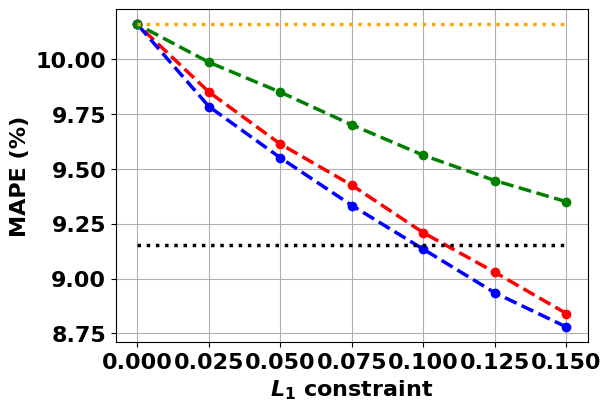

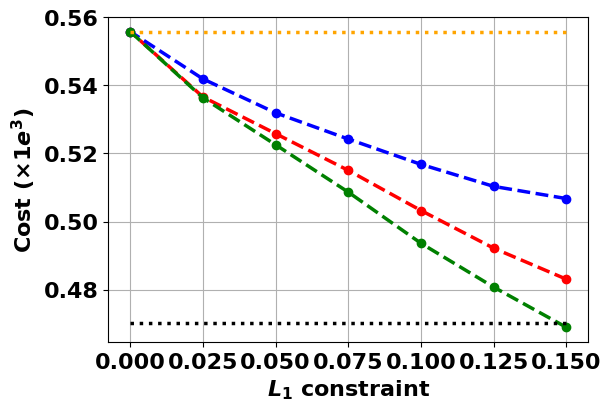

In [8]:
xmin = np.min(unchange_mse["l1_constraints"])
xmax = np.max(unchange_mse["l1_constraints"])

plt.figure()
plt.plot(unchange_mse["l1_constraints"], np.array(unchange_mse["mse_test"]) * 1e3, label = "MSE-PUMU", linestyle = "--", marker = "o", color = "red")
plt.plot(unchange_mape["l1_constraints"], np.array(unchange_mape["mse_test"]) * 1e3, label = "MAPE-PUMU", linestyle = "--", marker = "o", color = "blue")
plt.plot(unchange_cost["l1_constraints"], np.array(unchange_cost["mse_test"]) * 1e3, label = "Cost-PUMU", linestyle = "--", marker = "o", color = "green")
plt.hlines(y = unchange_mse["mse_test_ori"] * 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "black", label = "Original model")
plt.hlines(y = unchange_mse["mse_test_unlearn"] * 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "orange", label = "Unlearnt model")
plt.legend(loc = "best")
plt.xlabel(r"$L_1$ constraint")
plt.ylabel(r"MSE ($\times 1e^{-3}$)")
plt.grid()
plt.savefig(f"figs/{model_type}_unchange_mse.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(unchange_mse["l1_constraints"], unchange_mse["mape_test"], label = "MSE", linestyle = "--", marker = "o", color = "red")
plt.plot(unchange_mape["l1_constraints"], unchange_mape["mape_test"], label = "MAPE", linestyle = "--", marker = "o", color = "blue")
plt.plot(unchange_cost["l1_constraints"], unchange_cost["mape_test"], label = "Cost", linestyle = "--", marker = "o", color = "green")
plt.hlines(y = unchange_mape["mape_test_ori"], xmin = xmin, xmax = xmax, linestyle = ":", color = "black", label = "Original")
plt.hlines(y = unchange_mape["mape_test_unlearn"], xmin = xmin, xmax = xmax, linestyle = ":", color = "orange", label = "Unlearn")
# plt.legend(loc = "best")
plt.xlabel(r"$L_1$ constraint")
plt.ylabel("MAPE (%)")
plt.grid()
plt.savefig(f"figs/{model_type}_unchange_mape.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(unchange_mse["l1_constraints"], np.array(unchange_mse["cost_test"]) / 1e3, label = "MSE", linestyle = "--", marker = "o", color = "red")
plt.plot(unchange_mape["l1_constraints"], np.array(unchange_mape["cost_test"]) / 1e3, label = "MAPE", linestyle = "--", marker = "o", color = "blue")
plt.plot(unchange_cost["l1_constraints"], np.array(unchange_cost["cost_test"]) / 1e3, label = "Cost", linestyle = "--", marker = "o", color = "green")
plt.hlines(y = unchange_cost["cost_test_ori"] / 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "black", label = "Original")
plt.hlines(y = unchange_cost["cost_test_unlearn"] / 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "orange", label = "Unlearn")
# plt.legend(loc = "best")
plt.xlabel(r"$L_1$ constraint")
plt.ylabel(r"Cost ($\times 1e^{3}$)")
plt.grid()
plt.savefig(f"figs/{model_type}_unchange_cost.pdf", bbox_inches='tight')
plt.show()

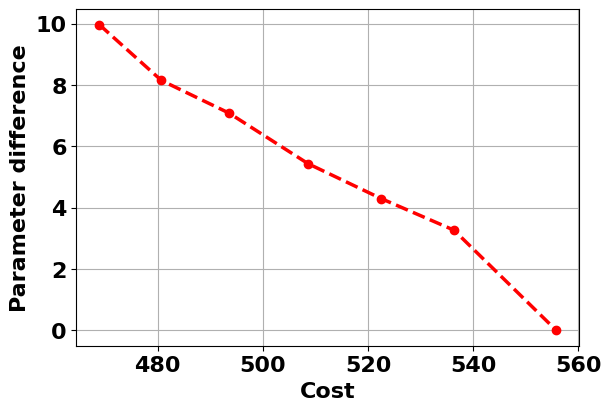

In [7]:
plt.figure()
plt.plot(unchange_cost['cost_test'], unchange_cost['parameter_diff'], linestyle = "--", marker = "o", color = "red")
plt.xlabel("Cost")
plt.ylabel("Parameter difference")
plt.grid()
plt.savefig(f"figs/{model_type}_tradeoff.pdf", bbox_inches='tight')
plt.show()